In [11]:
import sys 
from pathlib import Path
sys.path.append(str(Path().cwd().parent))

import numpy as np
import matplotlib.pyplot as plt
from src.core import MeasurementStatisticsSimulator
from src.sim_funcs import perfect_poisson, perfect_entangling_noise, cascade_cnots_entangling_noise, snr
from src.utils import plot_constant_error, dir_images, TimeStep
from src.analytic_snr import analytic_snr, expectation_0, expectation_cnot, variance_cnot

In [12]:
mu0 = 35/10
mu1 = 140/10
p = 0

t_list = np.append(np.arange(0.01, 10, 0.2), np.arange(10, 30, 1))
q_list = np.arange(1, 11)

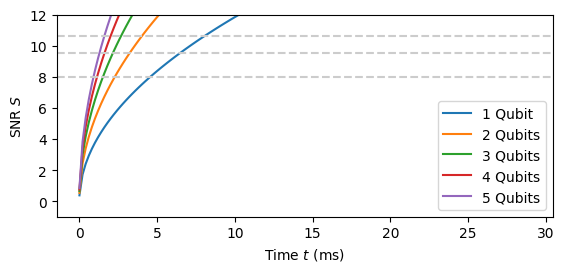

In [13]:
fontsize = 10

# We can make use of equation (20) in the supplementary material so we don't need to perform numerical simulations on the statistics. 
E0 = expectation_0(mu0)
E1 = expectation_0(mu1)
V0 = E0
V1 = E1

ET = expectation_cnot(p, cascade_cnots_entangling_noise)
VT = variance_cnot(p, cascade_cnots_entangling_noise)

sim_list = []
for N in q_list:
    # We still create Simulators to make use of the plotting functions but will manually add the results found with (20)
    sim = MeasurementStatisticsSimulator(N, perfect_entangling_noise, {}, perfect_poisson, {"mu": mu0}, perfect_poisson, 
                                                 {"mu": mu1}, None, {}, snr, {})
    sim.result = [TimeStep(t, [], [], None, analytic_snr(E0, E1, E0, V1, ET, VT, N, t)) for t in t_list]
    sim_list.append(sim)

fig, ax = plt.subplots()
for sim in sim_list[:5]:
    sim.plot_error(label=f"{sim.N} Qubit{'' if sim.N == 1 else 's'}")

error_list = (8, 9.5, 10.6)
for err in error_list:
    plt.axhline(y=err, color='0.8', linestyle='--')

plt.title("")
plt.xlabel(r"Time $t$ (ms)", fontsize=fontsize)
plt.ylabel(r"SNR $S$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim([-1,12])
plt.legend(prop={'size': fontsize})

ax.set_aspect('equal')
plt.show()

In [14]:
# fig.savefig(dir_images/"snr_perfect_experimental_squashed_import.svg", format="svg", dpi=300)

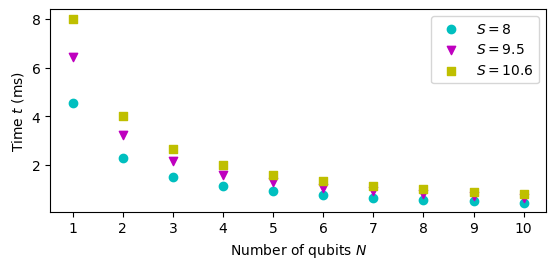

In [15]:
fig, ax = plt.subplots()
fontsize=10

for error, color, marker in zip(error_list, ("c", "m", "y"), ("o", "v", "s")):
    plot_constant_error(sim_list, error, label=fr"$S={error}$", color=color, marker=marker)

plt.xlabel("Number of qubits $N$", fontsize=fontsize)
plt.ylabel("Time $t$ (ms)", fontsize=fontsize)
plt.legend(prop={'size': fontsize})
plt.xticks(range(1,11,1), fontsize=fontsize)
ax.set_aspect(0.485)
plt.show()

In [16]:
# fig.savefig(dir_images/"snr_perfect_experimental_const_snr_squashed_import.svg", format="svg", dpi=300)

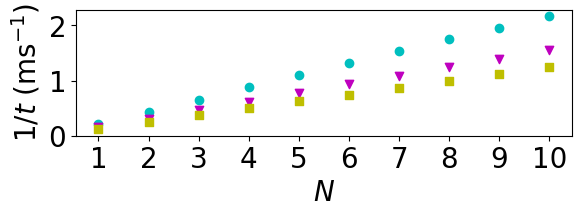

In [17]:
fontsize = 20

fig, ax = plt.subplots()
for error, color, marker in zip(error_list, ("c", "m", "y"), ("o", "v", "s")):
    plot_constant_error(sim_list, error, False, True, label=fr"$S={error}$", color=color, marker=marker)


plt.xlabel("$N$", fontsize=fontsize)
plt.ylabel("$1/t$ (ms$^{-1}$)", fontsize=fontsize)
plt.xticks(range(1,11,1), fontsize=fontsize)
plt.yticks(range(0,3), fontsize=fontsize)
ax.set_aspect(1.1)
plt.show()

In [ ]:
# fig.savefig(dir_images/"snr_perfect_experimental_const_snr_inset_squashed_import.svg", format="svg", dpi=300)